In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in the excel, put into DF
raw_df = pd.read_excel('inputs/NEW_PunchSourceEmails2023.xlsx') #read in the excel, put into DF

In [3]:
#drop unneeded cols 
df = raw_df.drop(columns=["Current State", "Out Type", "Work Contact: Work Email"])  

#add compensation column
df = df.assign(Comp  = round(df['Payroll Hours']*df['Pay Rate'],2))

df

,Last Name,First Name,Clock In ID,Clock Out ID,Time In,Time Out,Pay Code [Timecard],Payroll Hours,Pay Rate,Personal Contact: Personal Email,Comp
0,Abam,Aria,Kellogg Club,Kellogg Club,2023-05-28 11:43:00,2023-05-28 17:51:00,REGULAR,6.133333,15.0,ariaebam2006@gmail.com,92.00
1,Abam,Aria,Kellogg Club,Kellogg Club,2023-05-29 11:43:00,2023-05-29 15:01:00,REGULAR,3.300000,15.0,ariaebam2006@gmail.com,49.50
2,Abam,Aria,Kellogg Club,Kellogg Club,2023-06-04 11:43:00,2023-06-04 15:03:00,REGULAR,3.333333,15.0,ariaebam2006@gmail.com,50.00
3,Abam,Aria,Kellogg Club,RDBX,2023-06-20 11:51:00,2023-06-20 18:00:00,REGULAR,6.150000,15.0,ariaebam2006@gmail.com,92.25
4,Abam,Aria,Kellogg Club,Kellogg Club,2023-06-28 11:58:00,2023-06-28 15:03:00,REGULAR,3.083333,15.0,ariaebam2006@gmail.com,46.25
...,...,...,...,...,...,...,...,...,...,...,...
10817,von Brachel,Elinor,TCMGR,Maplewood CC,2023-07-20 09:00:00,2023-07-20 14:08:00,REGULAR,5.133333,14.5,evonbrachel@gmail.com,74.43
10818,von Brachel,Elinor,TCMGR,TCMGR,2023-07-27 14:30:00,2023-07-27 20:00:00,REGULAR,5.500000,14.5,evonbrachel@gmail.com,79.75
10819,von Brachel,Elinor,TCMGR,Maplewood CC,2023-08-13 14:00:00,2023-08-13 19:58:00,REGULAR,5.966667,14.5,evonbrachel@gmail.com,86.52
10820,von Brachel,Elinor,Maplewood CC,Maplewood CC,2023-08-15 13:27:00,2023-08-15 19:13:00,REGULAR,5.766667,14.5,evonbrachel@gmail.com,83.62


In [4]:
df[['Last Name', 'First Name', 'Clock In ID', 'Clock Out ID','Personal Contact: Personal Email']].nunique()

Last Name                           473
First Name                          351
Clock In ID                          59
Clock Out ID                         60
Personal Contact: Personal Email    532
dtype: int64

**There are at least 532 Employees that have punched in at least once. 60 unique locations** 

In [5]:
df.isna().sum()

Last Name                             0
First Name                            0
Clock In ID                           0
Clock Out ID                         89
Time In                               0
Time Out                              0
Pay Code [Timecard]                   0
Payroll Hours                         0
Pay Rate                              0
Personal Contact: Personal Email    650
Comp                                  0
dtype: int64

**Missing values for Clock Out ID and Personal Emails** 

In [6]:
df.describe()

,Payroll Hours,Pay Rate,Comp
count,10822.000000,10822.000000,10822.000000
mean,6.603308,16.710557,112.052961
std,2.548856,4.035793,59.103891
min,0.016667,0.000000,0.000000
25%,4.766667,14.500000,73.220000
50%,6.783333,15.500000,107.200000
75%,8.500000,17.000000,137.510000
max,23.983333,37.500000,486.200000


In [7]:
counts = df['Clock In ID'].value_counts().head(15)

percent = df['Clock In ID'].value_counts(normalize=True).head(15)

freq = pd.DataFrame({'counts':counts, 'per':percent})

freq

,counts,per
TCMGR,1203,0.111162
Cherry Valley CC,1045,0.096563
Kellogg Club,812,0.075032
Maplewood CC,658,0.060802
Shack CC,554,0.051192
Fiddlers Elbow,525,0.048512
Essex Fells CC,431,0.039826
Cedar Hill CC,415,0.038348
Trump Nat. CC,394,0.036407
Mountain Ridge CC,323,0.029847


In [8]:
all_clock_ins = df['Clock In ID'].unique().tolist()
print(all_clock_ins)

['Kellogg Club', 'RDBX', 'TCMGR', 'Cherry Valley CC', 'Maplewood CC', 'The Hills', 'CB Branchburg', 'Essex Fells CC', 'Mountain Ridge CC', 'Madison Commons pool', 'Kimberwyck 2', 'Preakness Hills CC', 'Fiddlers Elbow', 'skyview heights', 'Cedar Hill CC', 'Fairways Condo', 'Wellington', 'Flemington South Estates', 'Hunterdon Creekside', 'Copper Hill CC', 'Colonia CC', 'Mobile', 'SH Bernards', 'Mountain View', 'Trump Nat. CC', 'Stanton Ridge CC', 'Hawk pointe golf club', 'Union Elks', 'Riverdale 1', 'Lord Stirling', 'The Mountain Club', 'Skyview heights', 'Claridge House 1', 'Brookside Heights', 'SBCC', 'Terrace Lake', 'Essex County CC', 'ezMyTime Clock', 'Shack CC', 'ORANGE LAWN tennis club', 'Riverdale 2', 'Essex Park', 'Home Office', 'Bayonne Tower', '4 Seasons Chester', 'Columbia park', 'hearthwood village', 'modera berk', "Beden's Brook", 'Canoe Brook', 'Troy Hills', 'pointe at crystal', 'The Nell at Dunellen', 'The Woodlands West Orange', 'Short Hills Club', 'Weybridge Place', 'off

**Unexpected Clock In Values: TCMGR, RDBX, ezMyTime Clock, MyADP**

In [9]:
counts2 = df['Clock Out ID'].value_counts().head(10)

percent2 = df['Clock Out ID'].value_counts(normalize=True).head(15)

freq2 = pd.DataFrame({'counts':counts2, 'per':percent2})

freq2

,counts,per
Cedar Hill CC,375.0,0.034939
Cherry Valley CC,887.0,0.082642
Essex County CC,NaN,0.020311
Essex Fells CC,401.0,0.037361
Fiddlers Elbow,442.0,0.041181
Kellogg Club,733.0,0.068294
Maplewood CC,618.0,0.057579
Mountain Ridge CC,NaN,0.026740
ORANGE LAWN tennis club,NaN,0.021802
Preakness Hills CC,NaN,0.020870


In [10]:
sum(df['Comp'])

1212637.1399999917

In [11]:
criteria = ((df['Clock In ID'] != df['Clock Out ID']) |                                         #Location Checkin does not equal Location Checkout
            (df['Clock In ID'].str.contains('TCMGR|RDBX|ezMyTime Clock', na=False)) |           #Clockin has an unexpected value
            (df['Clock Out ID'].str.contains('TCMGR|RDBX|ezMyTime Clock', na=False)) |          #Clockout has an unexpected value
            (df['Clock In ID'].isna() | df['Clock Out ID'].isna()))                             #Clockin or Clockout is missing   

In [12]:
df_unexpected = df[criteria]
df_unexpected = df_unexpected[['Personal Contact: Personal Email', 'Clock In ID', 'Clock Out ID', 'Comp']]

df_unexpected

,Personal Contact: Personal Email,Clock In ID,Clock Out ID,Comp
3,ariaebam2006@gmail.com,Kellogg Club,RDBX,92.25
6,ariaebam2006@gmail.com,Kellogg Club,RDBX,91.25
8,ariaebam2006@gmail.com,Kellogg Club,RDBX,76.00
13,ariaebam2006@gmail.com,RDBX,RDBX,87.50
16,ariaebam2006@gmail.com,Kellogg Club,Mobile,89.50
...,...,...,...,...
10813,evonbrachel@gmail.com,TCMGR,TCMGR,104.40
10814,evonbrachel@gmail.com,TCMGR,TCMGR,53.65
10817,evonbrachel@gmail.com,TCMGR,Maplewood CC,74.43
10818,evonbrachel@gmail.com,TCMGR,TCMGR,79.75


In [28]:
imperfect = df_unexpected.shape[0] / df.shape[0]
imperfect

sum(df_unexpected['Comp'])

441293.4600000006

**441293 no allocation**

**35.42% of total data is unreliable -- cannot tag a location with certainty**

In [14]:
i_o_m_exclude = ['TCMGR', 'RDBX', 'ezMyTime Clock']

i_o_m_criteria = (
    df['Clock In ID'].notna() & 
    df['Clock Out ID'].notna() & 
    ~df['Clock In ID'].isin(i_o_m_exclude) & 
    ~df['Clock Out ID'].isin(i_o_m_exclude) & 
    (df['Clock In ID'] != df['Clock Out ID'])
)

in_out_mismatch = df[i_o_m_criteria]
in_out_mismatch = in_out_mismatch[['Personal Contact: Personal Email', 'Clock In ID', 'Clock Out ID', 'Comp']]

in_out_mismatch

,Personal Contact: Personal Email,Clock In ID,Clock Out ID,Comp
16,ariaebam2006@gmail.com,Kellogg Club,Mobile,89.50
113,dbalex8@gmail.com,Kellogg Club,SBCC,87.06
124,dbalex8@gmail.com,Kellogg Club,SBCC,63.55
176,mimiali555@gmail.com,Mountain Ridge CC,Essex Fells CC,119.62
179,mimiali555@gmail.com,Essex Fells CC,Mountain Ridge CC,123.48
...,...,...,...,...
10612,osiasxwilli@icloud.com,pointe at crystal,Essex County CC,113.36
10614,osiasxwilli@icloud.com,pointe at crystal,Essex County CC,90.74
10691,sofia.kaitlin.wood@gmail.com,Shack CC,Mobile,131.71
10780,taylorzinnie@gmail.com,Mobile,Shack CC,207.38


In [15]:
inout = in_out_mismatch.shape[0] / df.shape[0]
inout

0.08445758639807799

**8.45% of the total data is unreliable due to difference in Clock In/Out location (no unexpected values)**

In [16]:
in_mobile_values = ['TCMGR', 'RDBX', 'ezMyTime Clock']


in_mobile_criteria = (
    df['Clock In ID'].notna() &
    df['Clock Out ID'].notna() &
    ~df['Clock In ID'].isin(in_mobile_values) &
    df['Clock Out ID'].isin(in_mobile_values) 
)

In [17]:
in_mobile_mismatch = df[in_mobile_criteria]
in_mobile_mismatch = in_mobile_mismatch[['Personal Contact: Personal Email', 'Clock In ID', 'Clock Out ID', 'Comp']]

in_mobile_mismatch

,Personal Contact: Personal Email,Clock In ID,Clock Out ID,Comp
3,ariaebam2006@gmail.com,Kellogg Club,RDBX,92.25
6,ariaebam2006@gmail.com,Kellogg Club,RDBX,91.25
8,ariaebam2006@gmail.com,Kellogg Club,RDBX,76.00
28,katieacken915@gmail.com,Kellogg Club,RDBX,148.80
35,katieacken915@gmail.com,Kellogg Club,RDBX,148.54
...,...,...,...,...
10789,azotos101@yahoo.com,Colonia CC,RDBX,122.19
10796,azotos101@yahoo.com,Colonia CC,TCMGR,113.67
10800,azotos101@yahoo.com,Colonia CC,TCMGR,65.10
10802,azotos101@yahoo.com,Colonia CC,TCMGR,129.42


In [18]:
inmobile = in_mobile_mismatch.shape[0] / df.shape[0]
inmobile

0.11707632600258733

**11.71% of the total data is unreliable due to a Clock In location but Clock Out having unexpected values)**

In [19]:
out_mobile_values = ['TCMGR', 'RDBX', 'ezMyTime Clock']


out_mobile_criteria = (
    df['Clock In ID'].notna() &
    df['Clock Out ID'].notna() &
    df['Clock In ID'].isin(in_mobile_values) &
    ~df['Clock Out ID'].isin(in_mobile_values) 
)

In [20]:
out_mobile_mismatch = df[out_mobile_criteria]
out_mobile_mismatch = out_mobile_mismatch[['Personal Contact: Personal Email', 'Clock In ID', 'Clock Out ID', 'Comp']]

out_mobile_mismatch

,Personal Contact: Personal Email,Clock In ID,Clock Out ID,Comp
43,katieacken915@gmail.com,TCMGR,Kellogg Club,125.03
65,Meow0821@gmail.com,TCMGR,Maplewood CC,76.27
267,kaitlin.andersen5@gmail.com,RDBX,Kellogg Club,79.99
348,brettsharkguy@gmail.com,RDBX,Cedar Hill CC,130.13
363,bacinr@blair.edu,RDBX,Wellington,101.74
...,...,...,...,...
10783,azotos101@yahoo.com,RDBX,Colonia CC,73.88
10790,azotos101@yahoo.com,RDBX,Colonia CC,102.56
10793,azotos101@yahoo.com,RDBX,Colonia CC,59.16
10817,evonbrachel@gmail.com,TCMGR,Maplewood CC,74.43


In [21]:
outmobile = out_mobile_mismatch.shape[0] / df.shape[0]
outmobile

0.019774533357974498

**1.98% of the total data is unreliable due to a Clock Out but Clock In having unexpected values**

In [22]:
unexpec_values = ['TCMGR', 'RDBX', 'ezMyTime Clock']

unexpec_criteria = (
   # df['Clock In ID'].notna() &
   # df['Clock Out ID'].notna() &
    df['Clock In ID'].isin(in_mobile_values) &
    df['Clock Out ID'].isin(in_mobile_values) |
    ~df['Clock In ID'].notna() |
    ~df['Clock Out ID'].notna() 
    
)

In [23]:
unexpec_mismatch = df[unexpec_criteria]
unexpec_mismatch = unexpec_mismatch[['Personal Contact: Personal Email', 'Clock In ID', 'Clock Out ID', 'Comp']]

unexpec_mismatch

,Personal Contact: Personal Email,Clock In ID,Clock Out ID,Comp
13,ariaebam2006@gmail.com,RDBX,RDBX,87.50
47,andrewadvani1815@gmail.com,TCMGR,TCMGR,116.00
48,andrewadvani1815@gmail.com,TCMGR,TCMGR,87.00
49,andrewadvani1815@gmail.com,TCMGR,TCMGR,144.00
50,andrewadvani1815@gmail.com,TCMGR,TCMGR,184.00
...,...,...,...,...
10810,evonbrachel@gmail.com,TCMGR,TCMGR,123.25
10811,evonbrachel@gmail.com,TCMGR,TCMGR,94.25
10813,evonbrachel@gmail.com,TCMGR,TCMGR,104.40
10814,evonbrachel@gmail.com,TCMGR,TCMGR,53.65


In [24]:
unexpec = unexpec_mismatch.shape[0] / df.shape[0]
unexpec

0.13287747181666976

**13.28% of the total data is unreliable due to a Clock Out and Clock In having unexpected or missing values**

In [25]:
obs_dict = {
    'Pools | Pools':      inout,
    'Pools | MOBILE':     inmobile,
    'MOBILE | Pools':     outmobile,
    'MOBILE | MOBILE':    unexpec
}


data = [{'Category': key, 'Value': value} for key, value in obs_dict.items()]
obs_df = pd.DataFrame(data)


sum_values = obs_df.loc[0:3, 'Value'].sum()
expected_value = 1 - sum_values
expected_row = {'Category': 'Expected', 'Value': expected_value}
obs_df = obs_df.append(expected_row, ignore_index=True)


#sum_row = {'Category': 'Total', 'Value': obs_df['Value'].sum()}
#obs_df = obs_df.append(sum_row, ignore_index=True)
obs_df

/var/folders/99/81q36jp56hlcz9_60h7px6y40000gn/T/ipykernel_50490/752709449.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  obs_df = obs_df.append(expected_row, ignore_index=True)


,Category,Value
0,Pools | Pools,0.084458
1,Pools | MOBILE,0.117076
2,MOBILE | Pools,0.019775
3,MOBILE | MOBILE,0.132877
4,Expected,0.645814


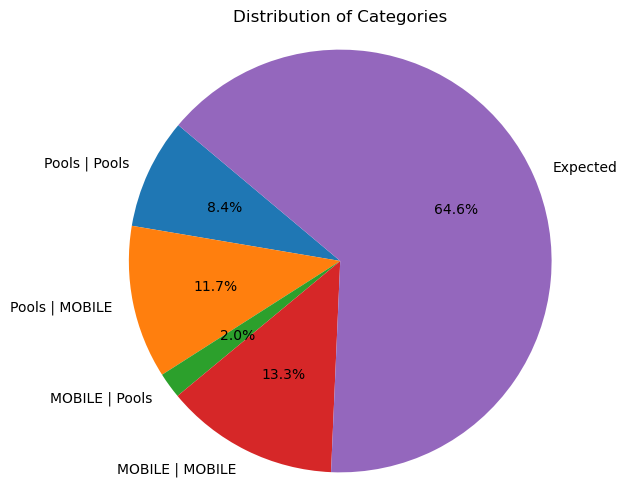

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(obs_df['Value'], labels=obs_df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [30]:
df

,Last Name,First Name,Clock In ID,Clock Out ID,Time In,Time Out,Pay Code [Timecard],Payroll Hours,Pay Rate,Personal Contact: Personal Email,Comp
0,Abam,Aria,Kellogg Club,Kellogg Club,2023-05-28 11:43:00,2023-05-28 17:51:00,REGULAR,6.133333,15.0,ariaebam2006@gmail.com,92.00
1,Abam,Aria,Kellogg Club,Kellogg Club,2023-05-29 11:43:00,2023-05-29 15:01:00,REGULAR,3.300000,15.0,ariaebam2006@gmail.com,49.50
2,Abam,Aria,Kellogg Club,Kellogg Club,2023-06-04 11:43:00,2023-06-04 15:03:00,REGULAR,3.333333,15.0,ariaebam2006@gmail.com,50.00
3,Abam,Aria,Kellogg Club,RDBX,2023-06-20 11:51:00,2023-06-20 18:00:00,REGULAR,6.150000,15.0,ariaebam2006@gmail.com,92.25
4,Abam,Aria,Kellogg Club,Kellogg Club,2023-06-28 11:58:00,2023-06-28 15:03:00,REGULAR,3.083333,15.0,ariaebam2006@gmail.com,46.25
...,...,...,...,...,...,...,...,...,...,...,...
10817,von Brachel,Elinor,TCMGR,Maplewood CC,2023-07-20 09:00:00,2023-07-20 14:08:00,REGULAR,5.133333,14.5,evonbrachel@gmail.com,74.43
10818,von Brachel,Elinor,TCMGR,TCMGR,2023-07-27 14:30:00,2023-07-27 20:00:00,REGULAR,5.500000,14.5,evonbrachel@gmail.com,79.75
10819,von Brachel,Elinor,TCMGR,Maplewood CC,2023-08-13 14:00:00,2023-08-13 19:58:00,REGULAR,5.966667,14.5,evonbrachel@gmail.com,86.52
10820,von Brachel,Elinor,Maplewood CC,Maplewood CC,2023-08-15 13:27:00,2023-08-15 19:13:00,REGULAR,5.766667,14.5,evonbrachel@gmail.com,83.62


In [33]:
grouped = df.groupby([df['Time In'].dt.month, 'Pay Code [Timecard]'])['Comp'].cumsum()
cumulative_df = pd.DataFrame({
    'Month': df['Time In'].dt.strftime('%B'),  # Month name
    'Pay Code [Timecard]': df['Pay Code [Timecard]'],
    'Cumulative Cost': grouped
})


aggregated_df = cumulative_df.groupby(['Month', 'Pay Code [Timecard]'])['Cumulative Cost'].max().reset_index()
aggregated_df.columns = ['Month', 'Pay Code [Timecard]', 'Cum Cost']
aggregated_df

,Month,Pay Code [Timecard],Cum Cost
0,April,REGSAL,4745.20
1,August,OVERTIME,6150.25
2,August,REGSAL,63620.59
3,August,REGULAR,310896.25
4,July,FF-PSL-FAM,0.00
5,July,OVERTIME,7974.91
6,July,REGSAL,81751.26
7,July,REGULAR,382556.43
8,June,OVERTIME,1785.20
9,June,REGSAL,56172.85
